In [37]:
# general imports
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd 
import numpy as np

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [38]:
# create basic x = y df
x = np.array([i for i in range(0,10)])
y = np.array([i for i in range(0,10)])

df = pd.DataFrame({'x':x, 'y':y}, columns=['x','y'])

In [39]:
df.head()

,x,y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


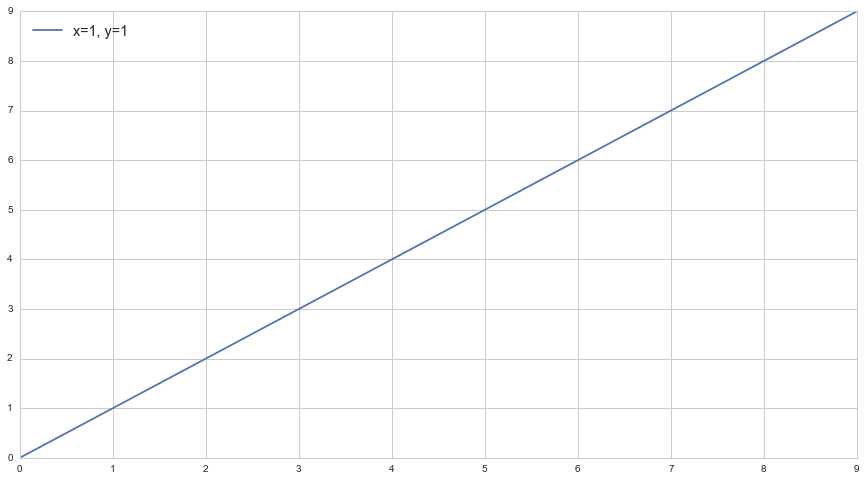

In [40]:
plt.figure(figsize=(15,8))
plt.plot(x,y, label=('x=1, y=1'))
plt.legend(loc=2, fontsize="x-large")
plt.show()

In [41]:
# create basic -x = y df
x = np.array([i for i in range(0,-10,-1)])
y = np.array([i for i in range(0,10)])

df = pd.DataFrame({'x':x, 'y':y}, columns=['x','y'])

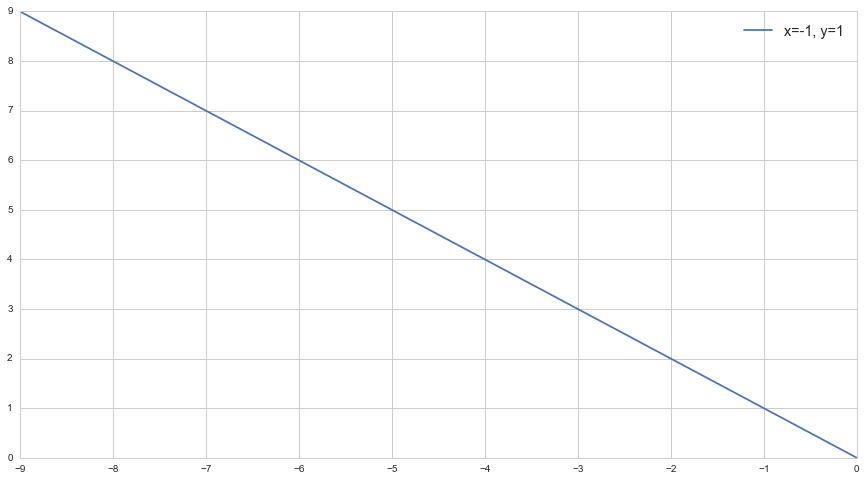

In [42]:
plt.figure(figsize=(15,8))
plt.plot(x,y, label=('x=-1, y=1'))
plt.legend(loc=1, fontsize="x-large")
plt.show()

In [43]:
celsius = [i for i in range(0,20)] 
fahrenheit = [(i * (9/5.0)) + 32 for i in range(0,20)] 

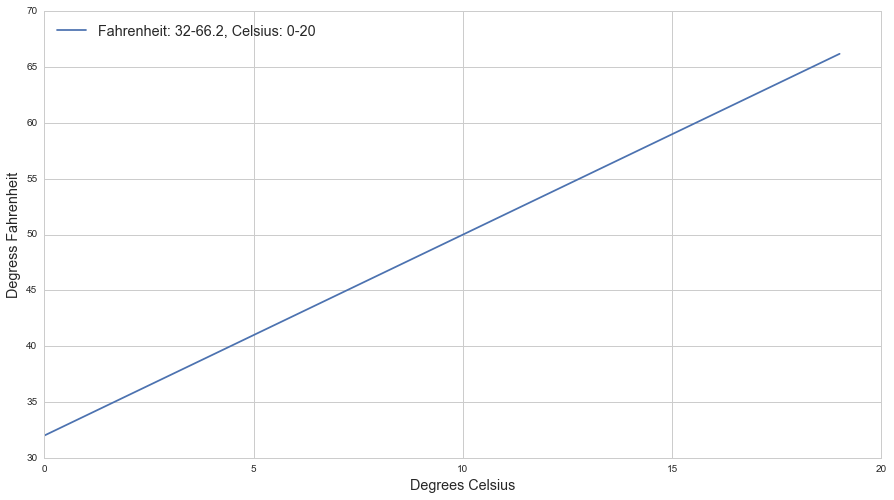

In [44]:
plt.figure(figsize=(15,8))
plt.plot(celsius,fahrenheit, label='Fahrenheit: 32-66.2, Celsius: 0-20')
plt.xlabel("Degrees Celsius", fontsize="x-large")
plt.ylabel("Degress Fahrenheit", fontsize="x-large")
plt.legend(loc=2, fontsize="x-large")
plt.show()

In [45]:
from sklearn.datasets import make_regression

# create our x and y sets, throwing a bit of noise in the x values just to spicen things up
# for the sake of simplicity, we'll use just 1 'feature,' i.e., one set of values for x.
# 100 samples is default
# random_state=99: we use a defined random set that will give us the same random set of numbers each time
x, y = make_regression(n_features=1, noise=20, random_state=99)


In [46]:
# note: make_regression returns a 2d array for x, even if it's one column of values
# thus you need to flatten 
# also sorting for human-readability
df = pd.DataFrame({'x':sorted(x.flatten()), 'y':sorted(y)}, columns=['x','y'])
df.head()

,x,y
0,-2.613661,-192.704371
1,-2.367838,-182.716864
2,-2.139704,-159.950428
3,-2.088335,-155.033847
4,-1.704292,-116.045616


In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print lr.coef_[0]
print lr.intercept_

70.6173051481
1.35684965848


In [49]:
# score our regression results
lr.score(x, y)

0.91733119618336079

In [50]:
# add our predictions to our df
# df3['predicted y'] = (df3['x3'] * 72.72244833) + 3.07326447646
df["y'"] = lr.predict(df['x'].reshape(-1,1))
df.head(10)

,x,y,y'
0,-2.613661,-192.704371,-183.212831
1,-2.367838,-182.716864,-165.853460
2,-2.139704,-159.950428,-149.743266
3,-2.088335,-155.033847,-146.115761
4,-1.704292,-116.045616,-118.995637
5,-1.678502,-115.939072,-117.174441
6,-1.435008,-108.348897,-99.979558
7,-1.389613,-107.863767,-96.773907
8,-1.198706,-105.264063,-83.292558
9,-1.191934,-85.022208,-82.814329


In [51]:
df["y - y'"] = df['y']-df["y'"]
df["(y - y')²"] = df["y - y'"]**2

In [52]:
df.head()

,x,y,y',y - y',(y - y')²
0,-2.613661,-192.704371,-183.212831,-9.491540,90.089330
1,-2.367838,-182.716864,-165.853460,-16.863404,284.374394
2,-2.139704,-159.950428,-149.743266,-10.207162,104.186157
3,-2.088335,-155.033847,-146.115761,-8.918085,79.532246
4,-1.704292,-116.045616,-118.995637,2.950021,8.702626


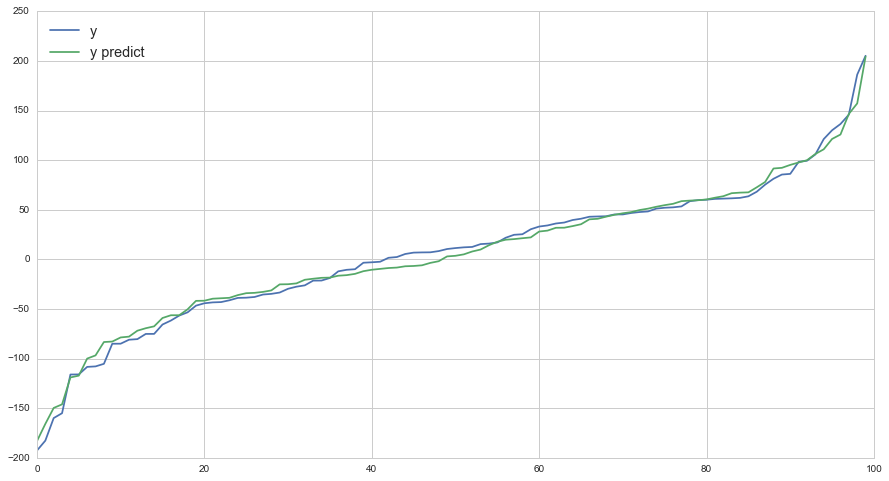

In [53]:
# plot our y against our y'
plt.figure(figsize=(15,8))
plt.plot(sorted(y), label='y')
plt.plot(sorted(lr.predict(x)), label='y predict')
plt.legend(loc=2, fontsize="x-large")
plt.show()

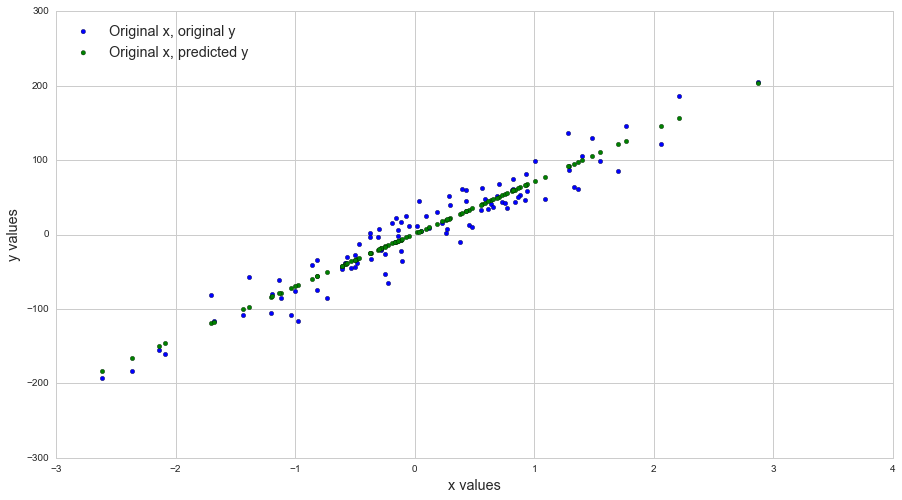

In [54]:
# plot predicted values over original
plt.figure(figsize=(15,8))
plt.scatter(x, y, label='Original x, original y')
plt.scatter(x, lr.predict(x), c='g', label='Original x, predicted y')
plt.xlabel("x values", fontsize="x-large")
plt.ylabel("y values", fontsize="x-large")
plt.legend(loc=2, fontsize="x-large")
plt.show()

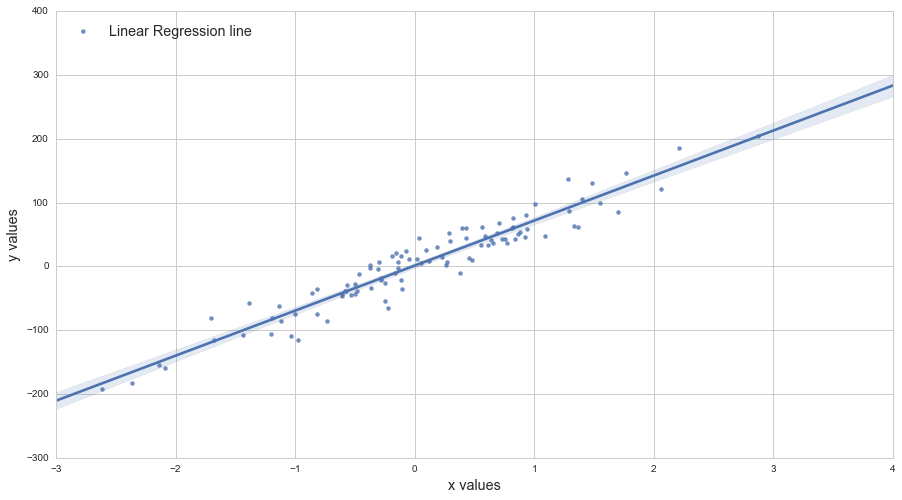

In [55]:
# plot with regression line
plt.figure(figsize=(15,8))
sb.regplot(x, y, label = "Linear Regression line")
plt.xlabel("x values", fontsize="x-large")
plt.ylabel("y values", fontsize="x-large")
plt.legend(loc=2, fontsize="x-large")
plt.show()

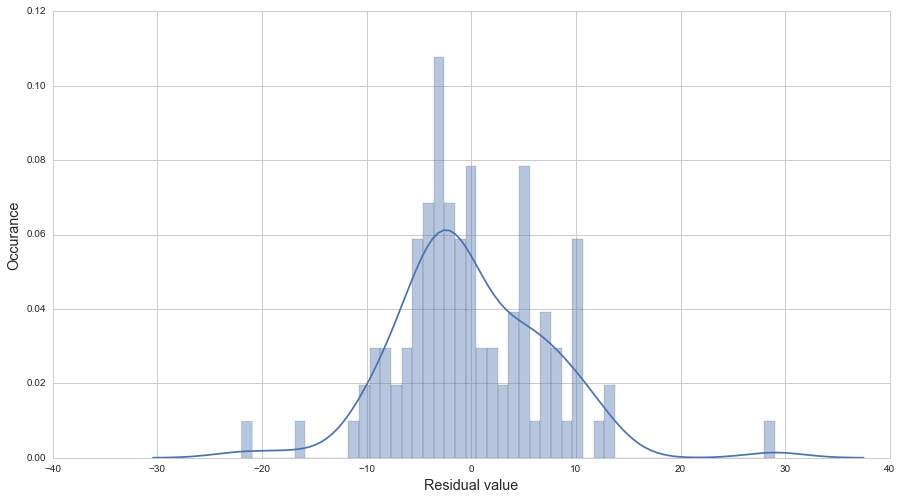

In [56]:
# histogram plot the distribution of our residuals
plt.figure(figsize=(15,8))
sb.distplot(df["y - y'"], bins=50)
plt.xlabel("Residual value", fontsize="x-large")
plt.ylabel("Occurance", fontsize="x-large")
plt.show()

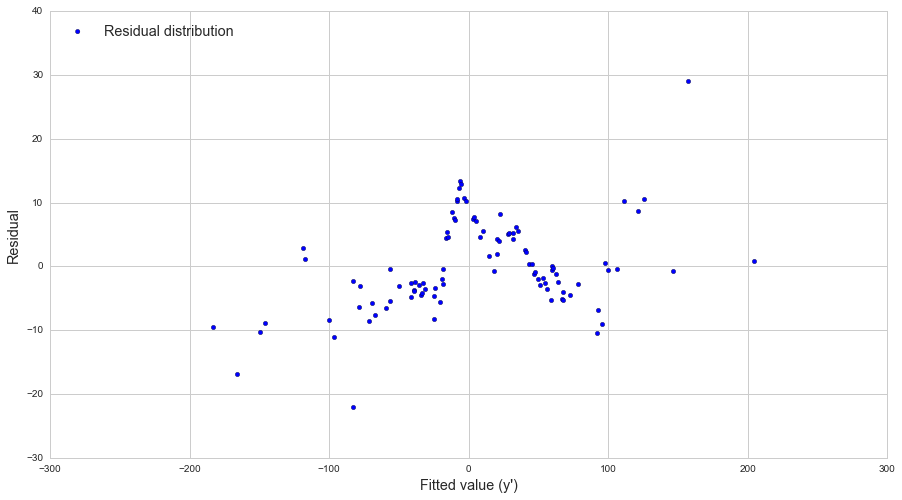

In [57]:
# scatter plot the distribution of our residuals
plt.figure(figsize=(15,8))
plt.scatter(df["y'"], df["y - y'"], label = 'Residual distribution')
plt.xlabel("Fitted value (y')", fontsize="x-large")
plt.ylabel("Residual", fontsize="x-large")
plt.legend(loc=2, fontsize="x-large")
plt.show()

In [58]:
# testing the sklearn regression with the math provided in this workbook:
# https://github.com/ga-students/DSI_DTLA_2/blob/master/curriculum/week-03/1.0-Intro-Regressions/1.1-Regression-Coefficient-by-Hand-Part-1.ipynb
    
def calculate_b1(x, y):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    
    numerator = np.sum((y - mean_y)*(x - mean_x))
    denom = np.sum((x - mean_x)**2)
    return numerator/denom

def calculate_b0(x, y, b1):
    return np.mean(y)-(b1*np.mean(x))

b1 = calculate_b1(x, y)
b0 = calculate_b0(x, y, b1)

In [59]:
# these are incorrect
print b1
print b0

-6.3725292616e-15
5.58124496275


#### The results here (in the cell above), are wrong. This threw me for awhile, but finally figured out that np.sum isn't doing the correct dot product because I need to flatten x (it's returned as a 2d array from the sklearn make_regression function). I retooled below and got the correct results.

In [60]:
# testing zip
X = x.flatten()
zip(X,y)[0:1]

[(0.63932199814898472, 40.993774284367426)]

In [61]:
# doing my own math for the beta coefficient calculation
mean_y = np.mean(y)
mean_x = np.mean(X)

covar_xy_test = sum([(i[0] - mean_x)*(i[1] - mean_y) for i in zip(X,y)])
var_x_test = sum([(i - mean_x)**2 for i in x])
coeff = covar_xy_test/var_x_test
y_intercept = mean_y-(coeff*mean_x)

print "coefficient is:",coeff[0]
print "y intercept is:", y_intercept[0]

coefficient is: 70.6173051481
y intercept is: 1.35684965848


#### The results in the cell above match what sklearn's LinearRegression function returns, which is nice, but was lucky. I flattened x first, which I only did because I was doing a zip of the two lists of numbers. But it turns out that's the difference. Trying to force a 2d array through the code from the original workbook will give you and answer, it will just be a wrong one.

In [62]:
# sklearn results
print lr.coef_[0]
print lr.intercept_

70.6173051481
1.35684965848


In [63]:
# Anscombe's Quartet
ans_df = pd.read_csv('data/anscombes_quartet.csv')

In [64]:
ans_df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


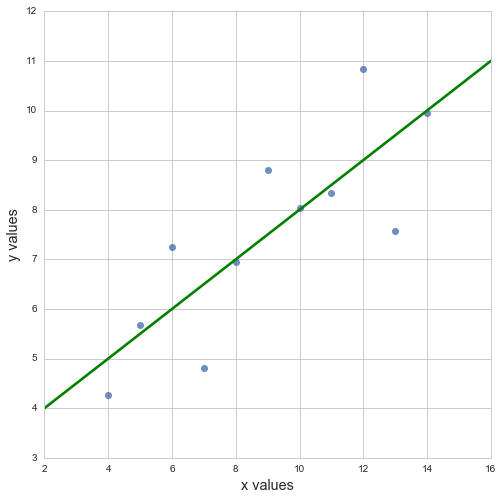

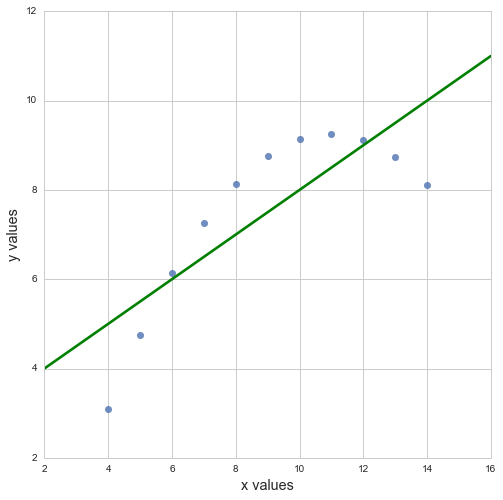

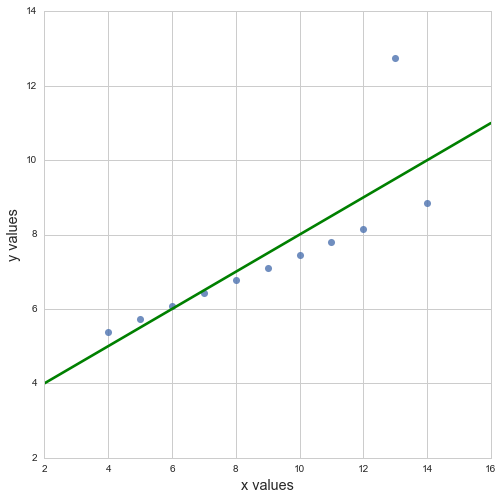

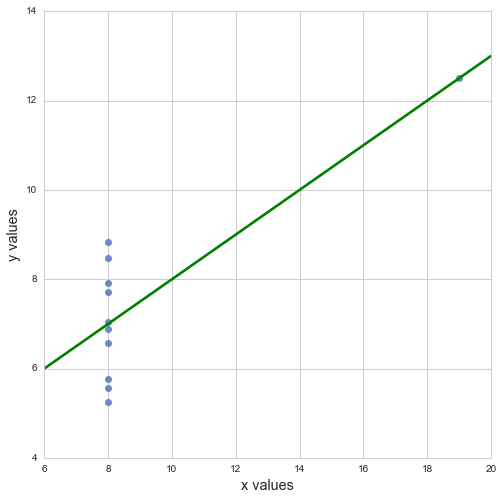

In [65]:
plt.figure(figsize=(8,8))
sb.regplot('X1', 'Y1', ci=None, data=ans_df, line_kws={"color": 'green'}, scatter_kws={"s": 50})
plt.xlabel("x values", fontsize="x-large")
plt.ylabel("y values", fontsize="x-large")

plt.figure(figsize=(8,8))
sb.regplot('X2', 'Y2', ci=None, data=ans_df, line_kws={"color": 'green'}, scatter_kws={"s": 50})
plt.xlabel("x values", fontsize="x-large")
plt.ylabel("y values", fontsize="x-large")

plt.figure(figsize=(8,8))
sb.regplot('X3', 'Y3', ci=None, data=ans_df, line_kws={"color": 'green'}, scatter_kws={"s": 50})
plt.xlabel("x values", fontsize="x-large")
plt.ylabel("y values", fontsize="x-large")

plt.figure(figsize=(8,8))
sb.regplot('X4', 'Y4', ci=None, data=ans_df, line_kws={"color": 'green'}, scatter_kws={"s": 50})
plt.xlabel("x values", fontsize="x-large")
plt.ylabel("y values", fontsize="x-large")

plt.show()